In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics, tree
from sklearn import model_selection
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE

In [379]:
cancer = pd.read_csv("https://raw.githubusercontent.com/NeilPandey/Test_Dataset/master/data.csv")

In [433]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,-1
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,-1
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,-1
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,-1
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,-1


In [381]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [382]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [383]:
cancer['diagnosis'],_ = pd.factorize(cancer['diagnosis'])
cancer['Unnamed: 32'],_ = pd.factorize(cancer['Unnamed: 32'])

In [384]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,-1
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,-1
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,-1
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,-1
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,-1


In [385]:
X1 = cancer.drop(['diagnosis','Unnamed: 32'], axis = 1)

In [386]:
X1.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [387]:
X1.shape

(569, 31)

In [388]:
y1 = cancer['diagnosis']

In [389]:
y1.shape

(569L,)

In [390]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [391]:
dtree = tree.DecisionTreeClassifier(criterion='gini', random_state=0)

In [392]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [393]:
y_pred = dtree.predict(X_test)

In [394]:
count_misclassified = (y_test != y_pred).sum()

In [395]:
print('Misclassified Samples: {}'.format(count_misclassified))

Misclassified Samples: 18


In [396]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)*100)

('Accuracy:', 89.47368421052632)


In [397]:
print('Precision:', metrics.precision_score(y_test, y_pred)*100)

('Precision:', 95.91836734693877)


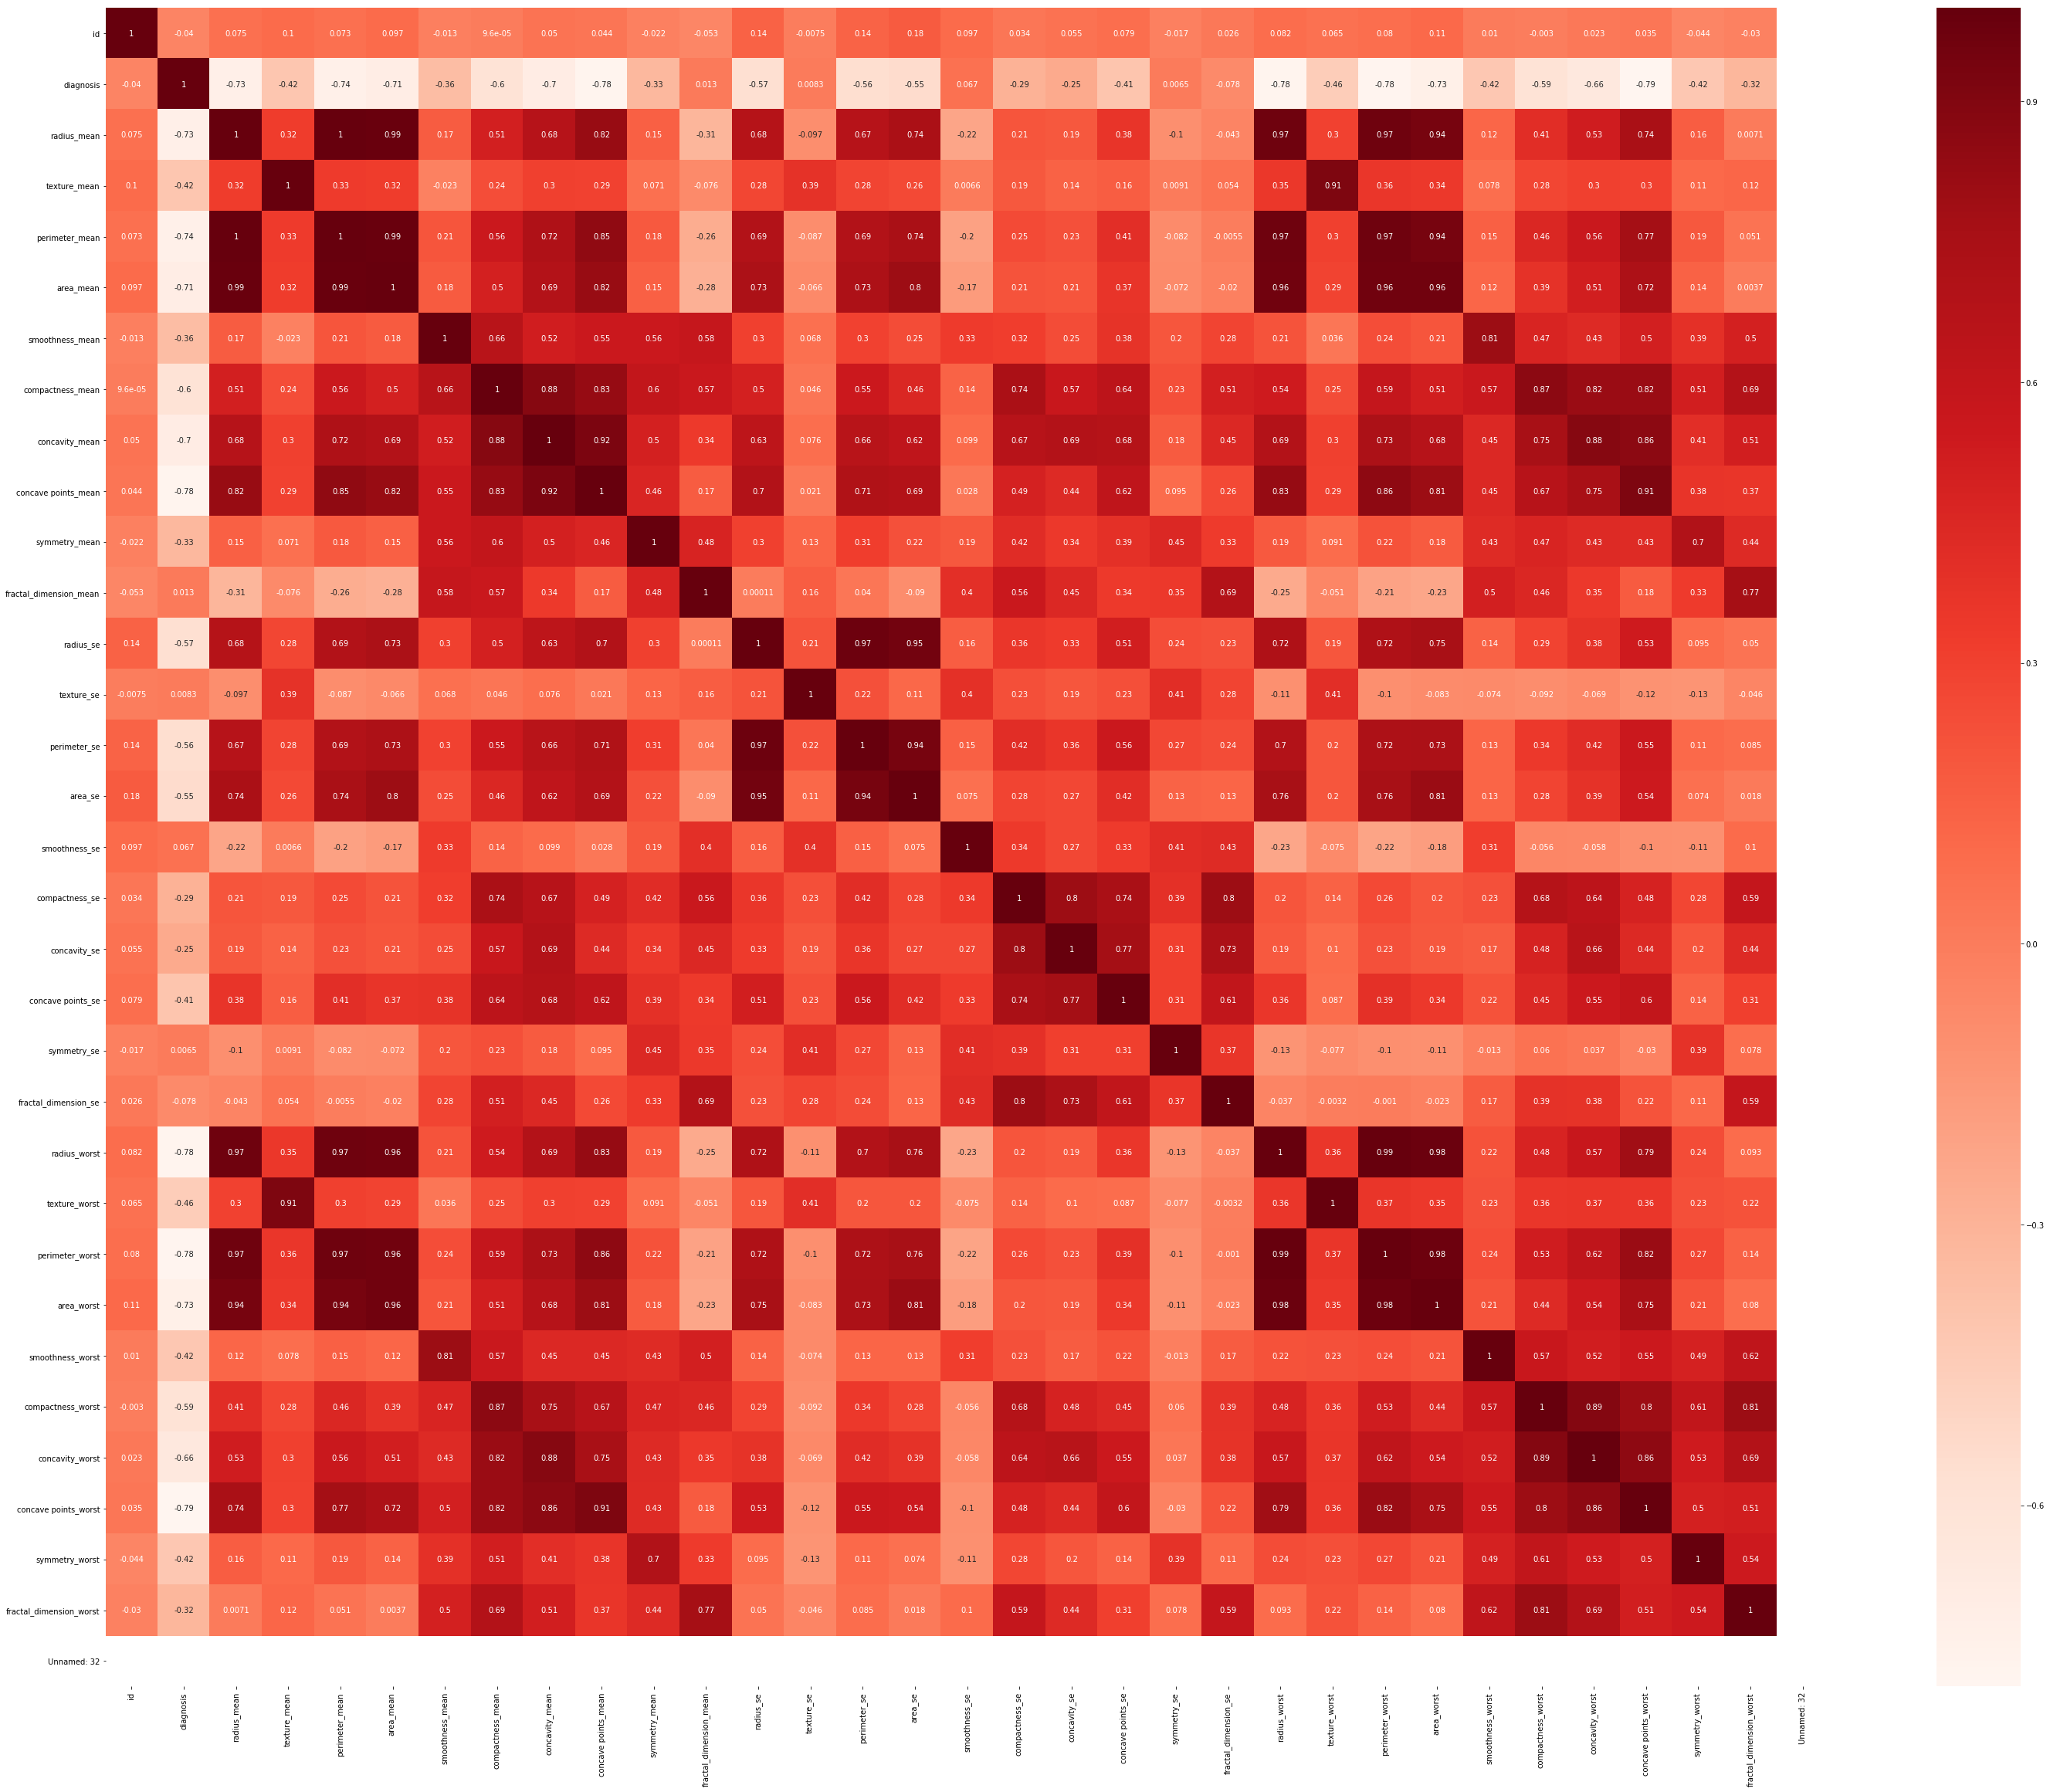

In [398]:
#Feature Engineering
plt.figure(figsize=(50,40))
cor = cancer.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [399]:
cor_target = abs(cor["diagnosis"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [400]:
#Using OLS
X_1 = sm.add_constant(X1)
model = sm.OLS(y1,X_1).fit()

In [401]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     59.49
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          3.98e-152
Time:                        09:51:39   Log-Likelihood:                 29.849
No. Observations:                 569   AIC:                             4.303
Df Residuals:                     537   BIC:                             143.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.0179      0.428      7.046      0.000       2.176       3.859
id                       5.085e-11   8.31e-11      0.612      0.541   -1.12e-10    2.14e-10
radius_mean                 0.2188      0.174      1.260      0.208      -0.122       0.560
texture_mean               -0.0047      0.008     -0.595      0.552      -0.020       0.011
perimeter_mean             -0.0237      0.025     -0.945      0.345      -0.073       0.026
area_mean                  -0.0003      0.001     -0.614      0.539      -0.001       0.001
smoothness_mean            -0.1063      2.019     -0.053      0.958      -4.072       3.859
compactness_mean            4.2390      1.335      3.176      0.002       1.617       6.861
concavity_mean             -1.4080      1.047     -1.345      0.179      -3.464       0.648
concave points_mean        -2.1205      1.981     -1.071      0.285      -6.011       1.770
symmetry_mean              -0.1000      0.743     -0.135      0.893      -1.560       1.360
fractal_dimension_mean      0.0120      5.576      0.002      0.998     -10.941      10.965
radius_se                  -0.4254      0.311     -1.368      0.172      -1.036       0.186
texture_se                  0.0081      0.037      0.218      0.827      -0.064       0.081
perimeter_se                0.0227      0.041      0.552      0.581      -0.058       0.104
area_se                     0.0008      0.001      0.587      0.557      -0.002       0.004
smoothness_se             -16.1685      6.649     -2.432      0.015     -29.229      -3.108
compactness_se             -0.0281      2.172     -0.013      0.990      -4.294       4.238
concavity_se                3.5793      1.302      2.750      0.006       1.022       6.136
concave points_se         -10.8305      5.472     -1.979      0.048     -21.580      -0.081
symmetry_se                -1.6484      2.730     -0.604      0.546      -7.012       3.715
fractal_dimension_se        6.9457     11.688      0.594      0.553     -16.014      29.905
radius_worst               -0.1959      0.058     -3.377      0.001      -0.310      -0.082
texture_worst              -0.0072      0.007     -1.031      0.303      -0.021       0.006
perimeter_worst             0.0024      0.006      0.411      0.682      -0.009       0.014
area_worst                  0.0010      0.000      3.171      0.002       0.000       0.002
smoothness_worst           -0.5288      1.436     -0.368      0.713      -3.349       2.291
compactness_worst          -0.0736      0.383     -0.192      0.848      -0.827       0.680
concavity_worst            -0.3807      0.269     -1.416      0.157      -0.909       0.147
concave points_worst       -0.4490      0.915     -0.491      0.624      -2.247       1.349
symmetry_worst             -0.5634      0.495  

In [402]:
##Backward Elimination from wrapper method 
cols = list(X1.columns) #[]
pmax = 1
while(len(cols)>0):
    p=[]
    X_1=X1[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols) 
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
            break
selected_features_BE = cols
print(selected_features_BE)


['radius_mean', 'compactness_mean', 'concave points_mean', 'radius_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'area_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [448]:
X3 = cancer.drop(['concave points_worst','compactness_worst','perimeter_worst','area_se','perimeter_se','perimeter_mean','area_mean','concavity_mean','texture_se','compactness_se','fractal_dimension_mean','fractal_dimension_se','diagnosis',
                  'texture_mean','id','symmetry_mean','smoothness_mean','smoothness_worst','symmetry_se','Unnamed: 32'],axis =1)

In [457]:
X3.head()

,radius_mean,compactness_mean,concave points_mean,radius_se,smoothness_se,concavity_se,concave points_se,radius_worst,texture_worst,area_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,0.27760,0.14710,1.0950,0.006399,0.05373,0.01587,25.38,17.33,2019.0,0.7119,0.4601,0.11890
1,20.57,0.07864,0.07017,0.5435,0.005225,0.01860,0.01340,24.99,23.41,1956.0,0.2416,0.2750,0.08902
2,19.69,0.15990,0.12790,0.7456,0.006150,0.03832,0.02058,23.57,25.53,1709.0,0.4504,0.3613,0.08758
3,11.42,0.28390,0.10520,0.4956,0.009110,0.05661,0.01867,14.91,26.50,567.7,0.6869,0.6638,0.17300
4,20.29,0.13280,0.10430,0.7572,0.011490,0.05688,0.01885,22.54,16.67,1575.0,0.4000,0.2364,0.07678


In [450]:
X3.shape

(569, 13)

In [451]:
y3 = cancer['diagnosis']

In [452]:
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X3, y3, test_size = 0.3, random_state = 0)

In [453]:
dtree3 = tree.DecisionTreeClassifier(criterion='gini', random_state=0)

In [454]:
dtree3.fit(X3_train, y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [458]:
y_pred3 = dtree3.predict(X3_test)

In [460]:
count_misclassified1 = (y3_test != y_pred3).sum()

In [461]:
print('Misclassified Samples: {}'.format(count_misclassified1))

Misclassified Samples: 14


In [462]:
print('Accuracy:', metrics.accuracy_score(y3_test, y_pred3)*100)

('Accuracy:', 91.81286549707602)


In [463]:
print('Precision:', metrics.precision_score(y3_test, y_pred3)*100)

('Precision:', 94.33962264150944)
